In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [7]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [44]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.90625
0.925


In [45]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.825
0.9375


In [37]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

print(clf.predict_proba(X_test))
print(clf.predict(X_test))

[[0.88758868 0.11241132]
 [0.95288549 0.04711451]
 [0.6410811  0.3589189 ]
 [0.99198104 0.00801896]
 [0.84805863 0.15194137]
 [0.02337168 0.97662832]
 [0.14493167 0.85506833]
 [0.45817512 0.54182488]
 [0.99631338 0.00368662]
 [0.01190823 0.98809177]
 [0.98346496 0.01653504]
 [0.68577898 0.31422102]
 [0.32591994 0.67408006]
 [0.76696423 0.23303577]
 [0.67775062 0.32224938]
 [0.4512203  0.5487797 ]
 [0.888458   0.111542  ]
 [0.66376928 0.33623072]
 [0.99418266 0.00581734]
 [0.98645756 0.01354244]
 [0.98229998 0.01770002]
 [0.07799673 0.92200327]
 [0.66239195 0.33760805]
 [0.70884984 0.29115016]
 [0.43226019 0.56773981]
 [0.99721586 0.00278414]
 [0.9912226  0.0087774 ]
 [0.1100631  0.8899369 ]
 [0.30979588 0.69020412]
 [0.88097372 0.11902628]
 [0.22040806 0.77959194]
 [0.19654052 0.80345948]
 [0.98164037 0.01835963]
 [0.72715539 0.27284461]
 [0.71414019 0.28585981]
 [0.01060093 0.98939907]
 [0.93701675 0.06298325]
 [0.8242555  0.1757445 ]
 [0.20529862 0.79470138]
 [0.8211337  0.1788663 ]


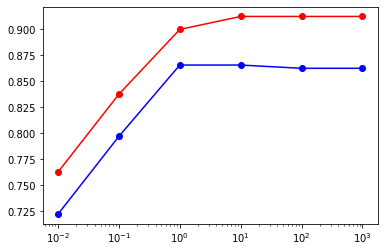

In [46]:
train_scores = []
test_scores = []

for c in [0.01, 0.1, 1, 10, 100, 1000]:
    clf = SVC(C=c, kernel='poly')
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot([0.01, 0.1, 1, 10, 100, 1000], np.array(train_scores), 'b-o')
plt.plot([0.01, 0.1, 1, 10, 100, 1000], np.array(test_scores), 'r-o')
plt.xscale('log')

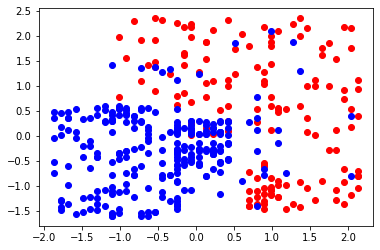

In [40]:
pred = clf.predict(X)

plt.plot(X[y == 1, 1], X[y == 1, 2], 'ro')
plt.plot(X[y == 0, 1], X[y == 0, 2], 'bo')

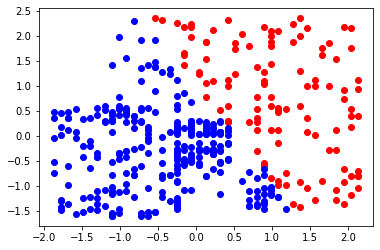

In [39]:
pred = clf.predict(X)

plt.plot(X[pred == 1, 1], X[pred == 1, 2], 'ro')
plt.plot(X[pred == 0, 1], X[pred == 0, 2], 'bo')